<a href="https://colab.research.google.com/github/HimanshuTirole-22/TSP_Using_Genetic_Algo/blob/main/TSP_Using_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import random
import copy
import math
import matplotlib.pyplot as plt

In [227]:
#Initialization
POPULATION_SIZE = 20
CITIES_SIZE= 20
TOUR_SIZE = 21
NUM_EXECUTION = 9999
population = []
x= []
y= []

In [228]:
tour = [[0 for x in range(TOUR_SIZE)] for y in range(TOUR_SIZE)]
dCidade = [[0 for x in range(POPULATION_SIZE)] for y in range(POPULATION_SIZE)]
distances = [0 for x in range(POPULATION_SIZE)]
parentsOne = None
parentsTwo = None
costByExecution = []

In [229]:
"""Generate a new possible path for a population"""
def generatePossiblePath():
  path = []
  for _ in range(1, CITIES_SIZE + 1):
    #generates a new number between 1 - 20
    randomNum = random.randint(1, 20)
    #while the generated number exists in the List, generates a new one
    while(numberExistsInPath(path, randomNum)):
      randomNum = random.randint(1, 20)
    path.append(randomNum)
  population.append(path)

In [230]:
"""
Method to verify if the number is already in the path
"""
def numberExistsInPath(path, number):
  for i in path:
    if i == number:
      return True
  return False

In [231]:
"""
Generates the X and Y arrays which represents the distances
in the x and y axis used to calculate the identity matrix in the fitness function
"""
def generateXandY():
  for _ in range(CITIES_SIZE):
    randomNumber = random.random()
    randomNumber = round(randomNumber,2)
    x.append(randomNumber)

    randomNumber = random.random()
    randomNumber = round(randomNumber, 2)
    y.append(randomNumber)

In [232]:
"""
Generates the Tour matrix, which is the same matrix as the population,
but with the first column duplicated at the end of it, afterall, the traveller
always have to arrive at the same place of where he started
"""
def generateTour():
  global tour
  tour = copy.deepcopy(population)
  for ways in tour:
    first= ways[0]
    ways.append(first)

In [233]:
"""
  Generates the an array with the sum of each path in the population array
  I oased on tour matrix
"""
def calculateDistances():
  global distances
  distances= [0 for x in range(CITIES_SIZE)]
  for i in range(len(population)):
    for j in range(len(population[i])):
      firstPos = 19 if tour[i][j] == 20 else tour[i][j]
      secondPos = 19 if tour[i][j+1] == 20 else tour[i][j+1]
      distances[i] += round(dCidade[firstPos][secondPos], 4)
  dict_dist = {i: distances[i] for i in range(0, len(distances))}
  distances = copy.deepcopy(dict_dist)
  return sorted(distances.items(), key=lambda kv: kv[1])

In [234]:
"""
Generate the identity matrix (dcidade) based on the x and y arrays
and then call the calculateDistances() method to generate the array with the sum
of each path to user later in the cycle process
"""
def fitnessFunction():
  for i in range(len(population)):
    for j in range(len(population)):
      dCidade[i][j] = round(math.sqrt(((x[i] - x[j])**2) + ((y[i] - y[j])** 2)),4)
  return calculateDistances()

In [235]:
"""
Performs the roulette function, generating two arrays with 5 parents each,
which will be used later to do the cycle process
"""
def rouletteFunction(sorted_x):
  global parentsOne
  global parentsTwo
  arr = []
  rouletteArr = []
  for i in range(10):
    arr.append(sorted_x[i][0])
  for j in range(len(arr)):
    for _ in range(10 - j):
      rouletteArr.append(arr[j])
  parentsOne = createParents(rouletteArr)
  parentsTwo = createParents(rouletteArr)

In [236]:
"""
  Auxiliary method used in the roulette to generate the two parents array
"""
def createParents(rouletteArr):
  parentArr = []
  for _ in range(5):
    parentArr.append(rouletteArr[random.randint(0, 54)])
  return parentArr

In [237]:
"""
Method used in the cycle method to see if there's any duplicated city
"""
def hasDuplicity(auxArray, usedIndexes):
  for i in range(len(auxArray)):
    for j in range(i, len(auxArray)):
      if i != j and auxArray[i] == auxArray[j]:
        if i in usedIndexes:
          return j
        else:
          return i
  return -1


In [238]:
"""Generate the first population"""
def generateFirstPopulation():
  # For each position, generates a new possible path
  for _ in range(1, POPULATION_SIZE + 1):
    generatePossiblePath()

In [239]:
"""
makes the swap between 2 cities in the path with a 5% chance of mutation
"""
def mutate(matrix):
  for i in range(0, len(matrix)):
    for _ in range(0, len(matrix[i])):
      ranNum = random.randint(1, 100)
      if ranNum >= 1 and ranNum <= 5:
        indexOne = random.randint(0, 19)
        indexTwo = random.randint(0, 19)
        auxOne = matrix[i][indexOne]
        auxTwo = matrix[i][indexTwo]
        matrix[i][indexOne] = auxTwo
        matrix[i][indexTwo] = auxOne

In [240]:

"""
Method that has the ' cycle' logic.
1. For each two children in the children array, makes a random swap between
the two children until there's no duplicated element
2. Mutate the children that were generated
3. Adds the children in the population array I
"""

def doCycle(sorted_x):
  global population
  children = []
  
  for i in range(5):
    parentOneAux = parentsOne[i]
    parentTwoAux = parentsTwo[i]
    usedIndexes = []
    
    randomIndexInsideCromossomus = random.randint(0, POPULATION_SIZE - 1)
    usedIndexes.append(randomIndexInsideCromossomus)

    childOne = copy.deepcopy(population[parentOneAux])
    childTwo = copy.deepcopy(population[parentTwoAux])

    valAuxOne = childOne[randomIndexInsideCromossomus]
    valAuxTwo = childTwo[randomIndexInsideCromossomus]

    childOne[randomIndexInsideCromossomus] = valAuxTwo
    childTwo[randomIndexInsideCromossomus] = valAuxOne
  
    while(hasDuplicity(childOne, usedIndexes) != -1):
      newIndex = hasDuplicity(childOne, usedIndexes)
      usedIndexes.append(newIndex)
    
      valAuxOne = childOne[newIndex]
      valAuxTwo = childTwo[newIndex]

      childOne[newIndex] = valAuxTwo
      childTwo[newIndex] = valAuxOne

#After generating the children, add them in the children's array
    children.append(childOne)
    children.append(childTwo)

#Mutate the children array
  mutate(children)

#Make a temp copy of the population before changing it
  tempPop = copy.deepcopy(population)

  for i in range(10):
    population[i] = copy.deepcopy(tempPop[sorted_x[i][0]])

#Adjust the population
  for j in range(10, POPULATION_SIZE):
    population[j] = copy.deepcopy(children[j - 10])

Total Population: 20
Mutation Probability: 5%
Nuber of cities: 20
Optimal path cost: 4.3143
Best Route: [8, 10, 11, 3, 5, 6, 9, 14, 7, 12, 1, 19, 20, 17, 2, 16, 18, 15, 13, 4]


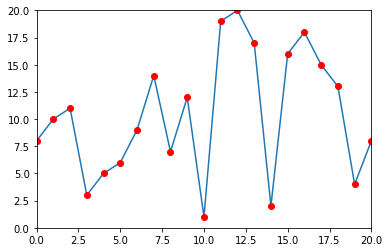

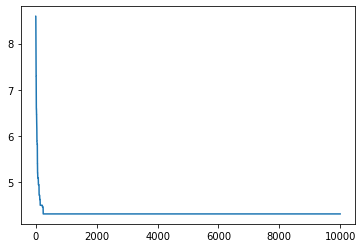

In [241]:
def main():
  #Runs only once. Generates the population, x and y, and tour matrix
  generateFirstPopulation()
  generateXandY()
  generateTour()
  
  #Runs in a Loop @ - 9999.
  for _ in range(NUM_EXECUTION):
    sorted_x= fitnessFunction()
    rouletteFunction(sorted_x)
    doCycle(sorted_x)
    generateTour()  # Generate the Tour matrix again, as the population is updated
    costByExecution.append(sorted_x[0][1]) #Appends the cost to the array of costs (plotted at the

  #Generates the fitness values for the last population
  sorted_x = fitnessFunction()
  print('Total Population: %s' % (POPULATION_SIZE))
  print('Mutation Probability: 5%')
  print('Number of cities: %s' % (CITIES_SIZE))
  print('Optimal path cost: %s' % sorted_x[0][1])
  print('Best Route: %s' % population[0])

  # Show the path graph
  plt.plot(tour[0])
  plt.plot(tour[0], 'ro')
  plt.axis([0, 20, 0, 20])
  plt.show()
  
  #Show the cost graph
  plt.plot(costByExecution)
  plt.show()

if __name__ == "__main__":
  main()